
# importing libraries & dataset

In [1]:
!pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import category_encoders as ce

In [3]:
df = pd.read_csv("D:\datasets/dubai_properties.csv")


# printing information about df

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [6]:
print(df.isna().sum())

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64


In [7]:
print(df.duplicated().sum())

0


# columns relationships

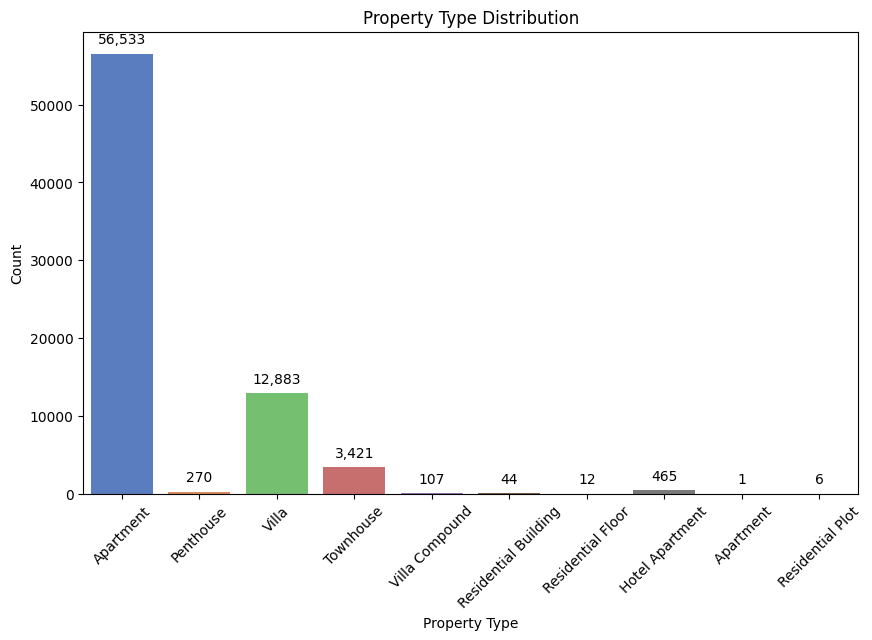

In [7]:
# Property Type Distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Type', data=df, palette='muted')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

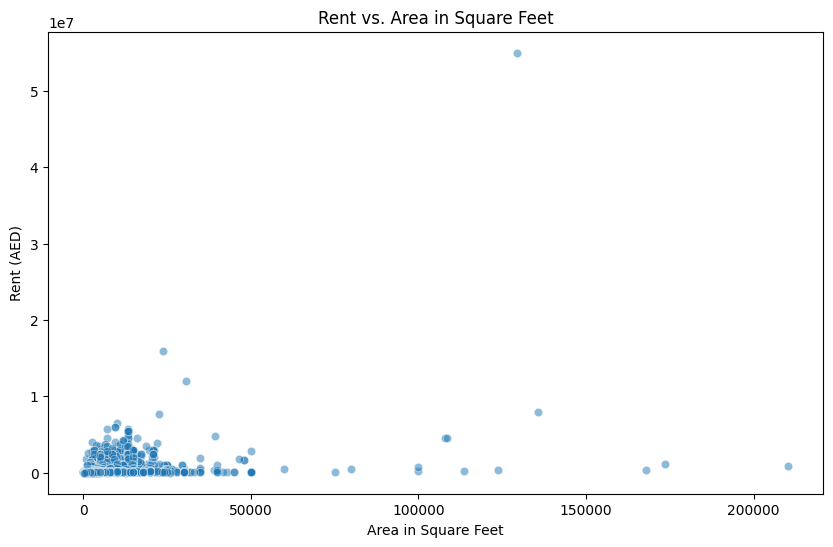

In [8]:
# Relationship between Rent and Area in Square Feet
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df, alpha=0.5)
plt.title('Rent vs. Area in Square Feet')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent (AED)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


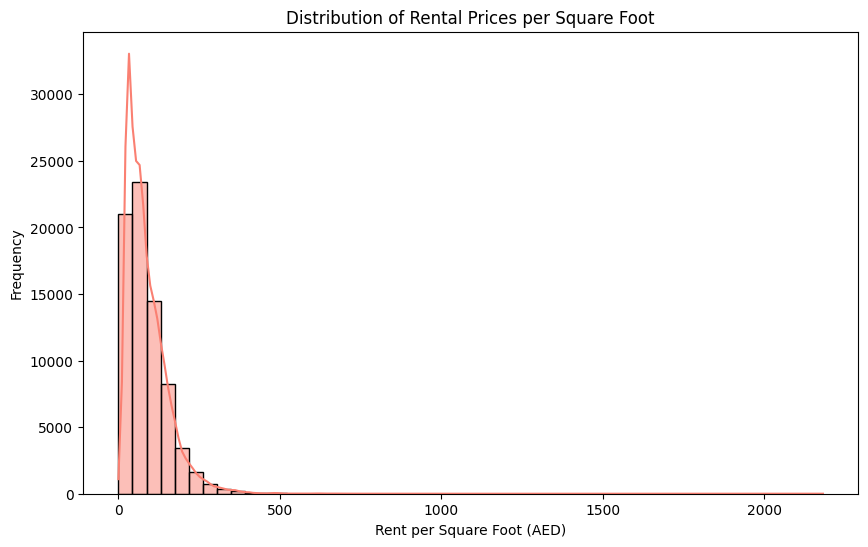

In [9]:
# Distribution of Rental Prices per Square Foot
plt.figure(figsize=(10,6))
sns.histplot(df['Rent_per_sqft'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Rental Prices per Square Foot')
plt.xlabel('Rent per Square Foot (AED)')
plt.ylabel('Frequency')
plt.show()

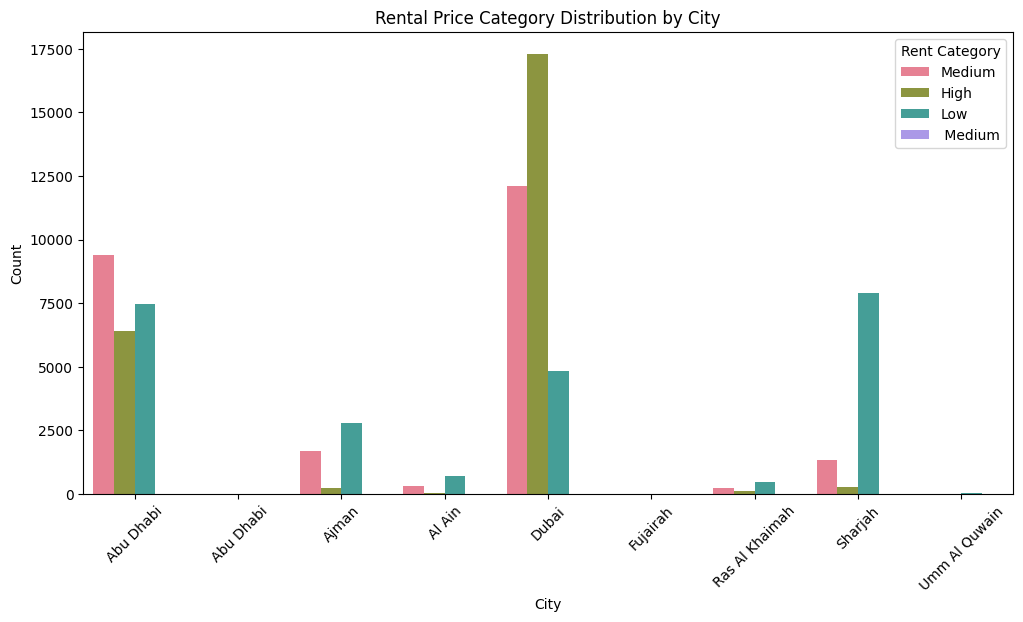

In [10]:
# Rental Price Category Distribution by City
plt.figure(figsize=(12,6))
sns.countplot(x='City', hue='Rent_category', data=df, palette='husl')
plt.title('Rental Price Category Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Rent Category')
plt.xticks(rotation=45)
plt.show()

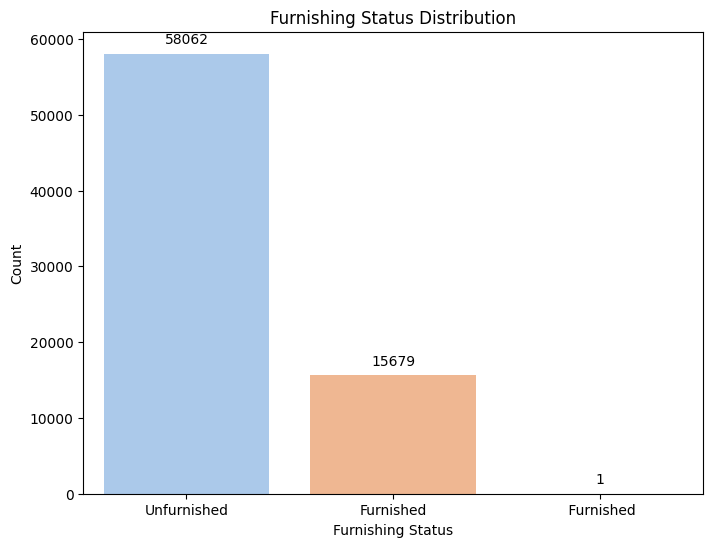

In [11]:
# Furnishing Status Distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Furnishing', data=df, palette='pastel')
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


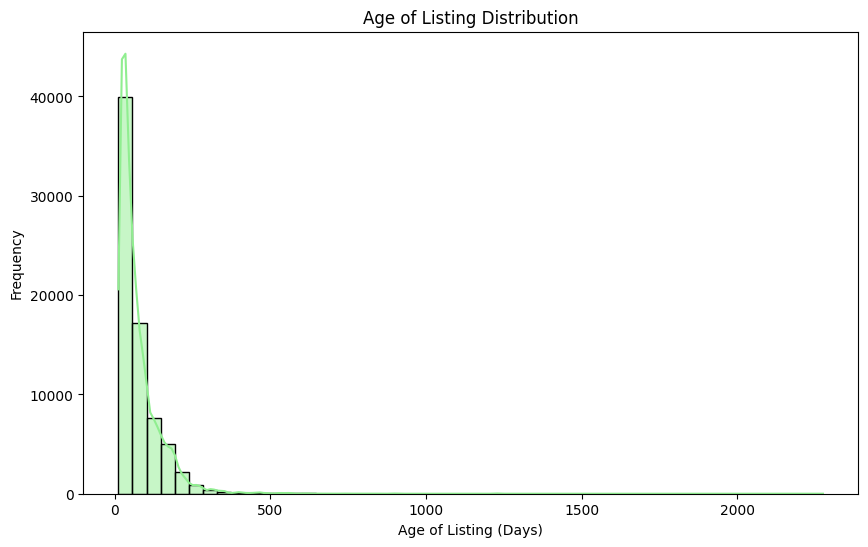

In [12]:
# Age of Listing Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age_of_listing_in_days'], bins=50, kde=True, color='lightgreen')
plt.title('Age of Listing Distribution')
plt.xlabel('Age of Listing (Days)')
plt.ylabel('Frequency')
plt.show()

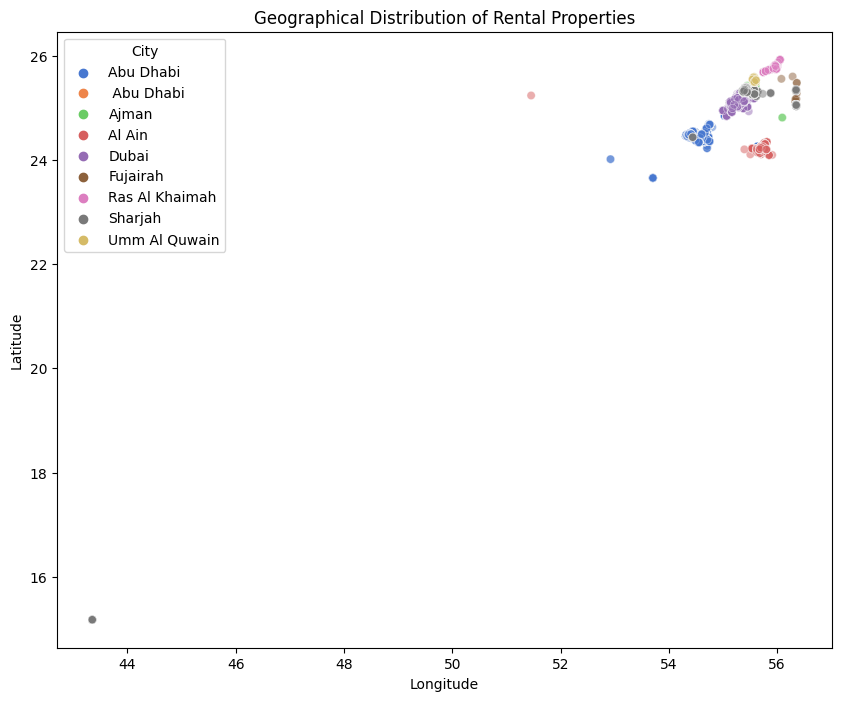

In [13]:
# Geographical Distribution of Rental Properties
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='City', data=df, palette='muted', alpha=0.5)
plt.title('Geographical Distribution of Rental Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City')
plt.show()

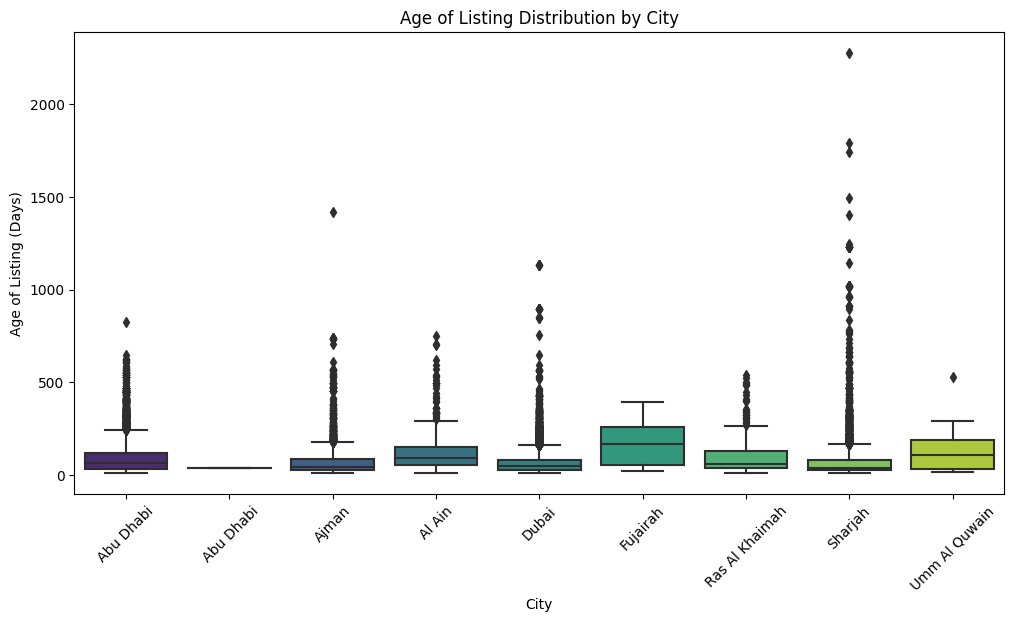

In [14]:
# Age of Listing Distribution by City
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Age_of_listing_in_days', data=df, palette='viridis')
plt.title('Age of Listing Distribution by City')
plt.xlabel('City')
plt.ylabel('Age of Listing (Days)')
plt.xticks(rotation=45)
plt.show()

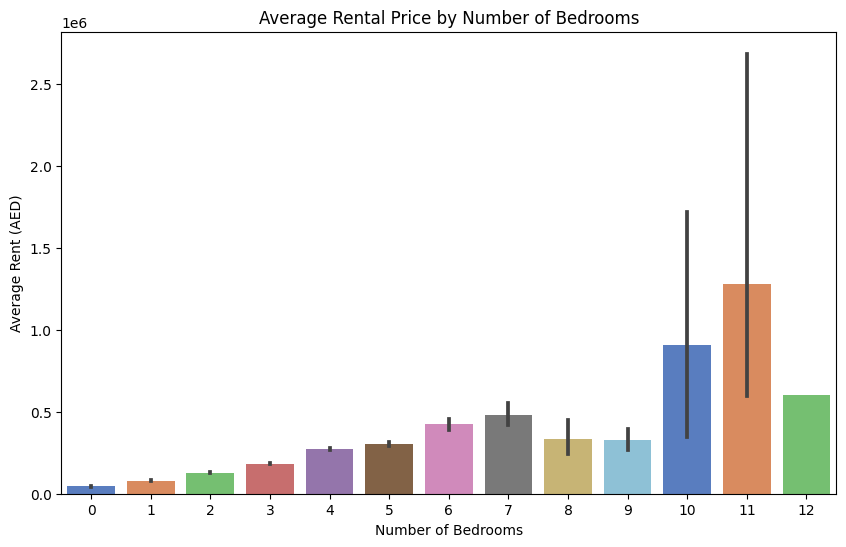

In [15]:
# Average Rental Price by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.barplot(x='Beds', y='Rent', data=df, palette='muted')
plt.title('Average Rental Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent (AED)')
plt.show()


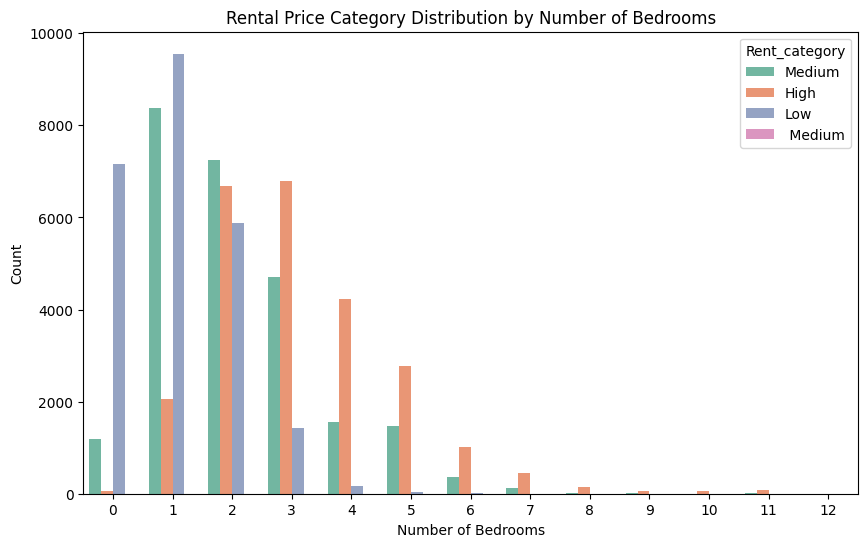

In [16]:
# Rental Price Category Distribution by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.countplot(x='Beds', hue='Rent_category', data=df, palette='Set2')
plt.title('Rental Price Category Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

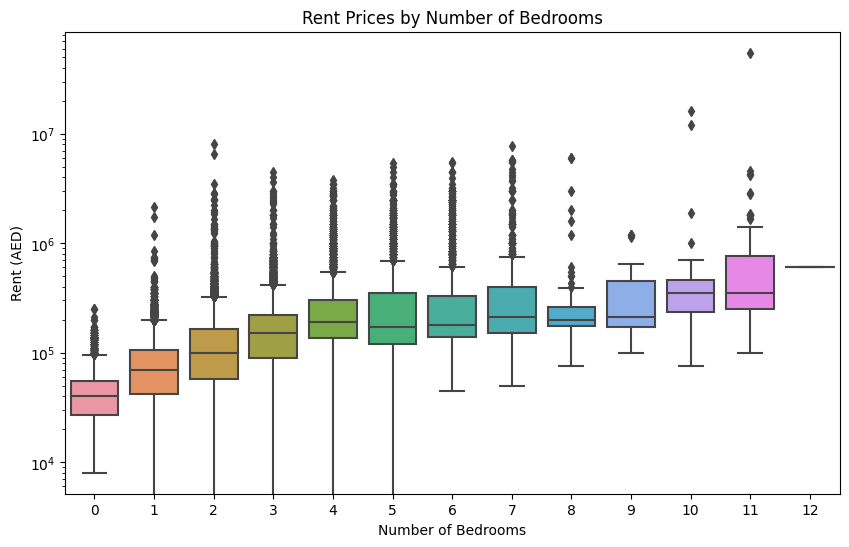

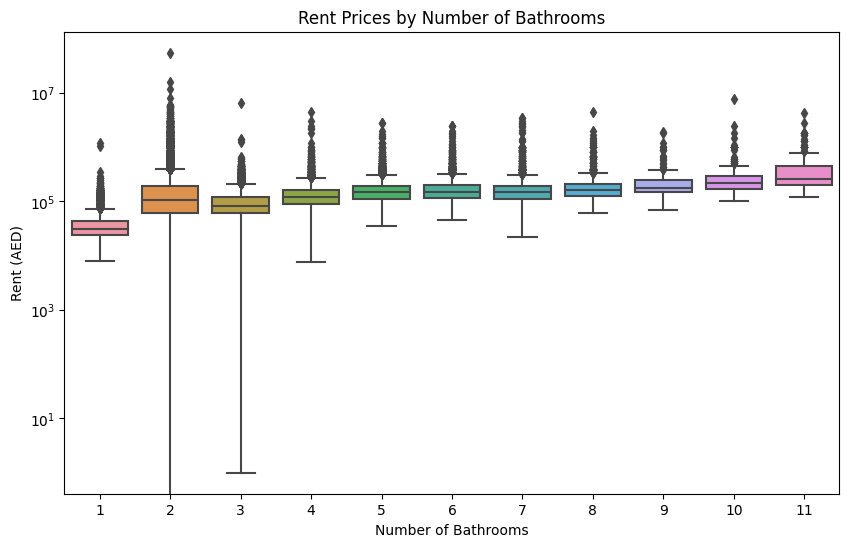

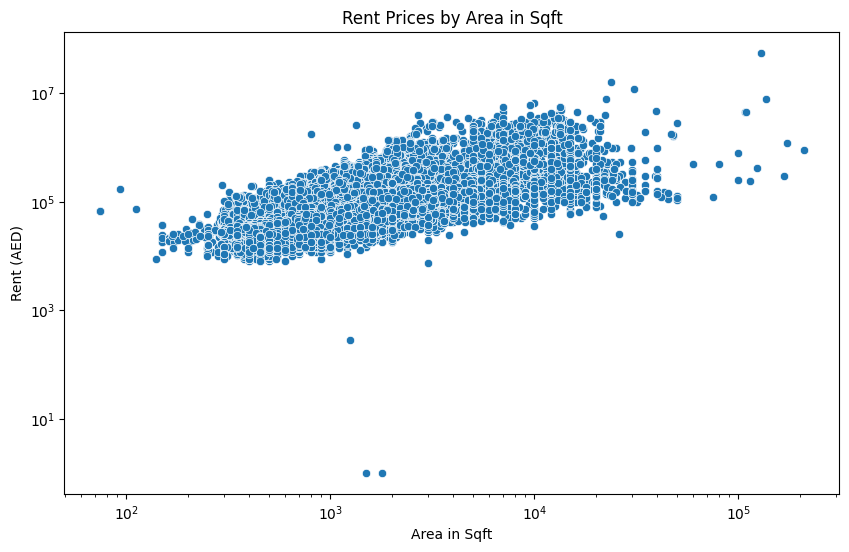

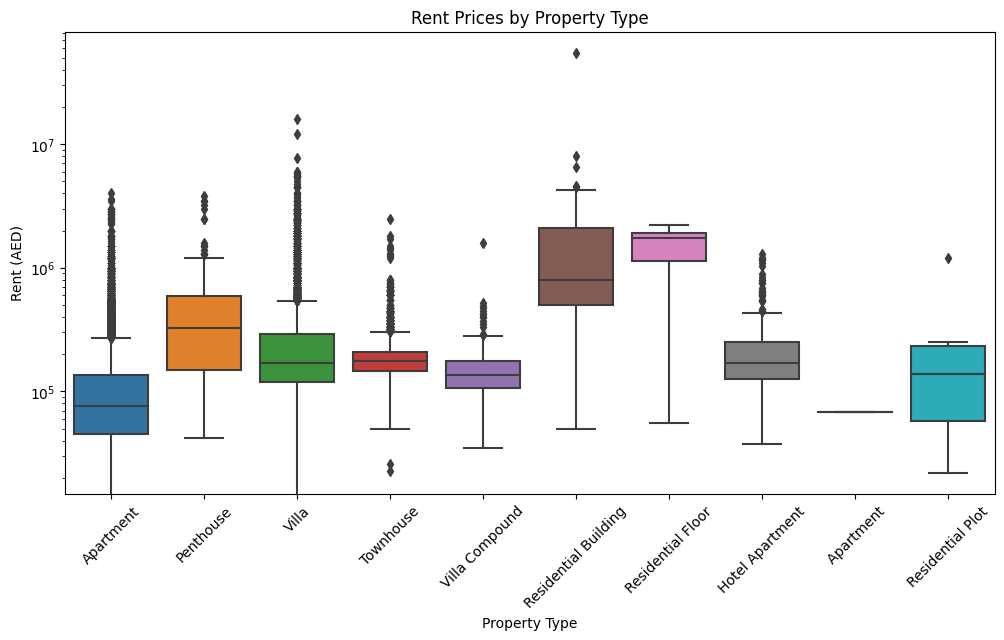

In [17]:
# Analyzing the relationship between rent and number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Beds', y='Rent', data=df)
plt.title('Rent Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and number of bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Baths', y='Rent', data=df)
plt.title('Rent Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and area in sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df)
plt.title('Rent Prices by Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Rent (AED)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Analyzing the relationship between rent and property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Rent', data=df)
plt.title('Rent Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

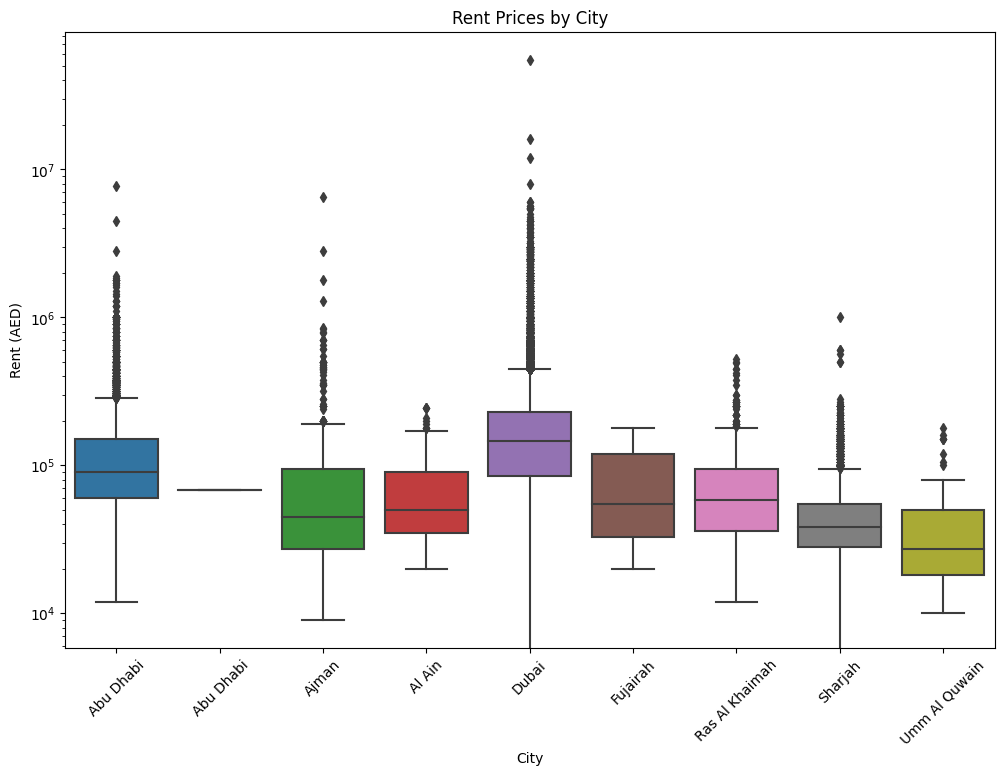

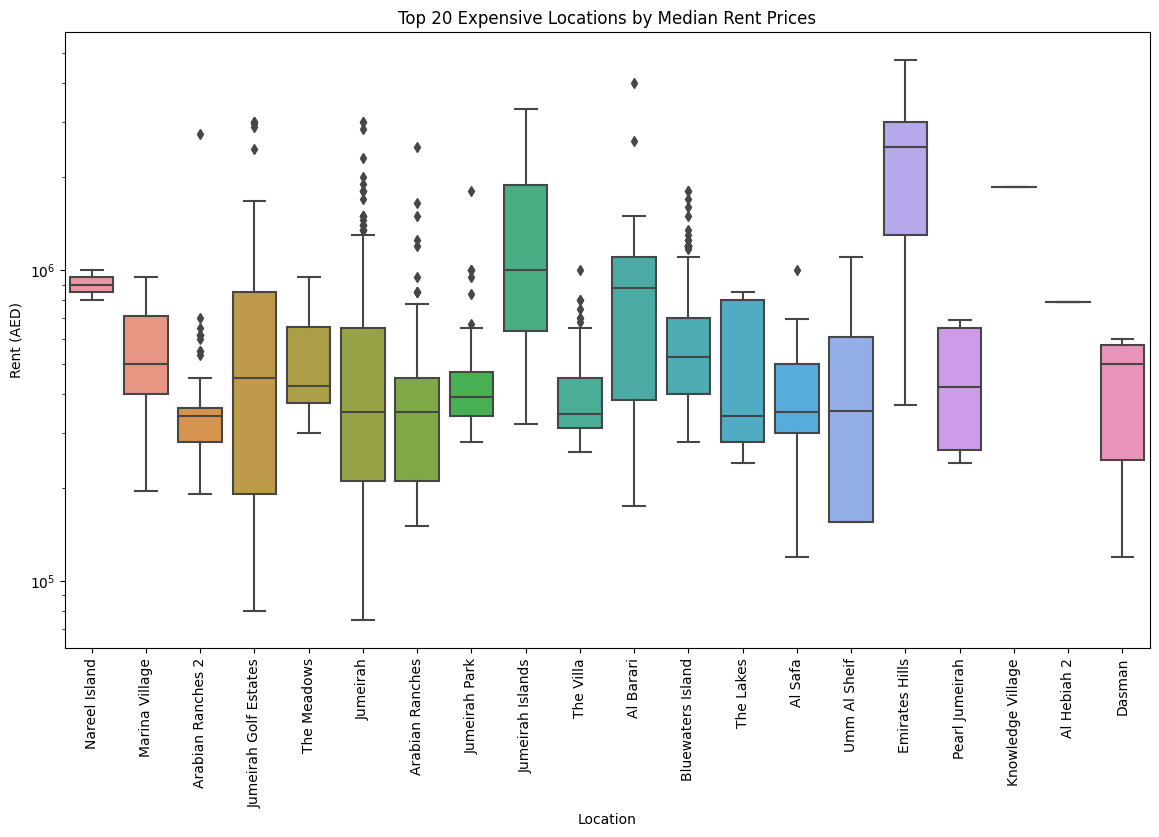

In [18]:
# Analyzing how rent varies across different cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Rent', data=df)
plt.title('Rent Prices by City')
plt.xlabel('City')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

# Analyzing how rent varies across different locations within cities
# Due to potentially large number of locations, we display only the top 20 locations by median rent
top_locations = df.groupby('Location')['Rent'].median().sort_values(ascending=False).head(20).index
filtered_data = df[df['Location'].isin(top_locations)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Rent', data=filtered_data)
plt.title('Top 20 Expensive Locations by Median Rent Prices')
plt.xlabel('Location')
plt.ylabel('Rent (AED)')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Least Expensive Areas for Renting (Top 10):
Location
Hamriyah Free Zone                 12000.0
Al Raudah                          12000.0
Maysaloon                          13000.0
Masfoot                            13500.0
Al Hawiyah                         15000.0
Al Yarmook                         15000.0
Al Bataeh                          16000.0
Al Humaid City                     16000.0
Al Rass                            16000.0
Emirates Modern Industrial Area    16000.0
Name: Rent, dtype: float64

Most Expensive Areas for Renting (Top 10):
Location
Jumeirah Golf Estates     450000.0
Dasman                    500000.0
Marina Village            500000.0
Bluewaters Island         527500.0
Al Hebiah 2               790000.0
Al Barari                 875000.0
Nareel Island             900000.0
Jumeirah Islands         1000000.0
Knowledge Village        1859550.0
Emirates Hills           2499000.0
Name: Rent, dtype: float64


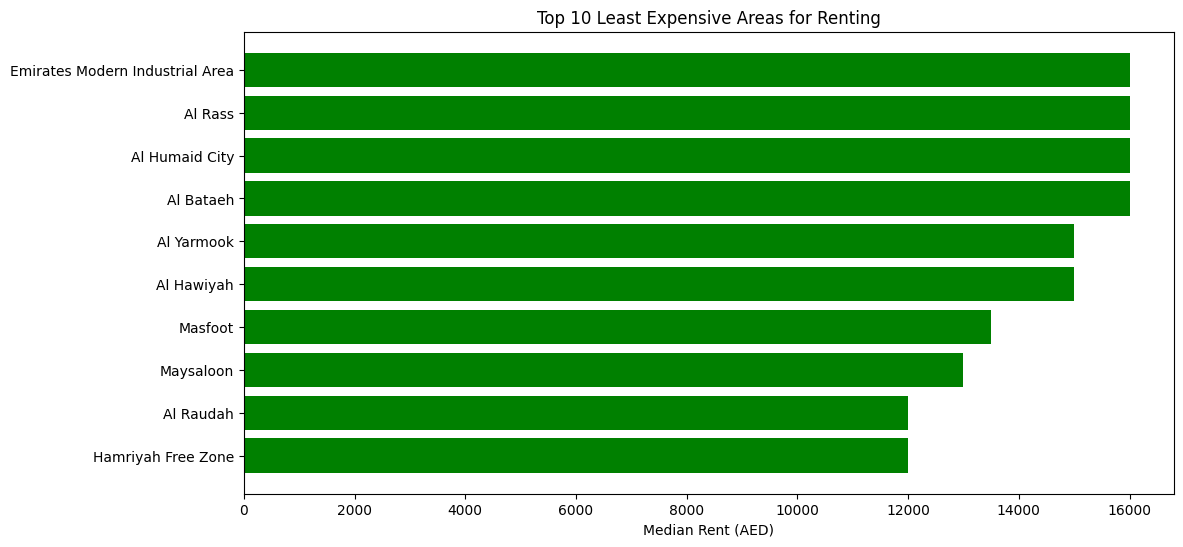

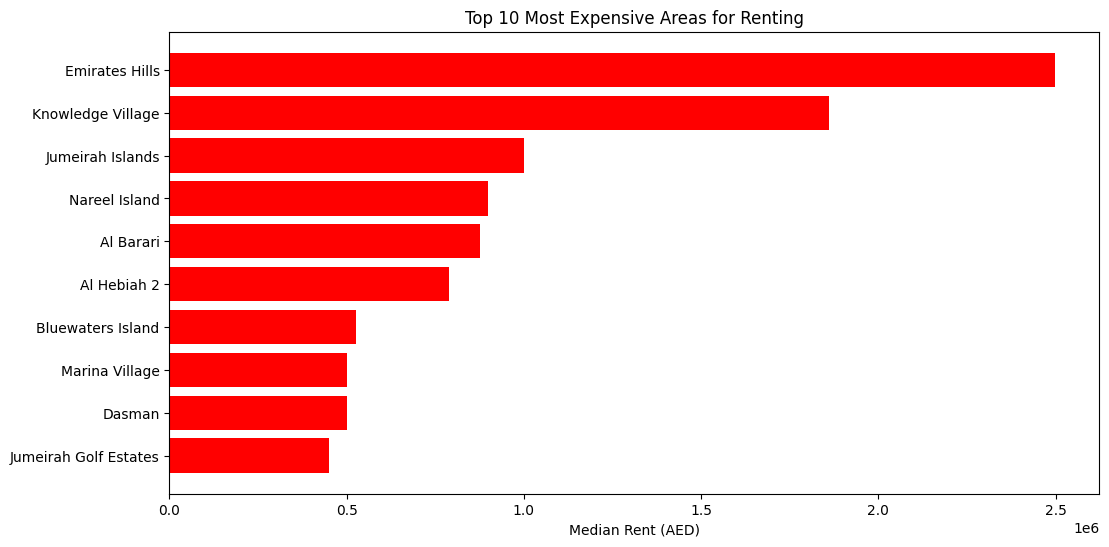

In [19]:
# Identify the most expensive and least expensive areas for renting
# Calculate median rent for each location and sort them
location_rent_stats = df.groupby('Location')['Rent'].median().sort_values()

# Display the least expensive areas
print("Least Expensive Areas for Renting (Top 10):")
print(location_rent_stats.head(10))

# Display the most expensive areas
print("\nMost Expensive Areas for Renting (Top 10):")
print(location_rent_stats.tail(10))

# Least expensive areas
plt.figure(figsize=(12, 6))
least_expensive = location_rent_stats.head(10)
plt.barh(least_expensive.index, least_expensive.values, color='green')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Least Expensive Areas for Renting')
plt.show()

# Most expensive areas
plt.figure(figsize=(12, 6))
most_expensive = location_rent_stats.tail(10)
plt.barh(most_expensive.index, most_expensive.values, color='red')
plt.xlabel('Median Rent (AED)')
plt.title('Top 10 Most Expensive Areas for Renting')
plt.show()

In [20]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        mode = 'markers',
        marker=dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues'
        )
        ))

fig.update_layout(
        title = 'Geo Spatial View',
        geo=dict(
        scope='asia',  # Set the geographic scope
        showland=True,
        landcolor = "rgb(250, 250, 250)",
        subunitcolor = "rgb(217, 217, 217)",
        countrywidth = 0.5,
        subunitwidth = 0.5,
        showcountries=True,
        countrycolor='darkgray',
        showocean=True,
        oceancolor='lightblue',
        showlakes=True,
        lakecolor='lightblue',
        showrivers=True,
        rivercolor='lightblue',
        showcoastlines=True,
        coastlinecolor='darkblue',
        projection_type='natural earth',
        center=dict(lon=55.2708, lat=25.2048)
    )
)

fig.show()

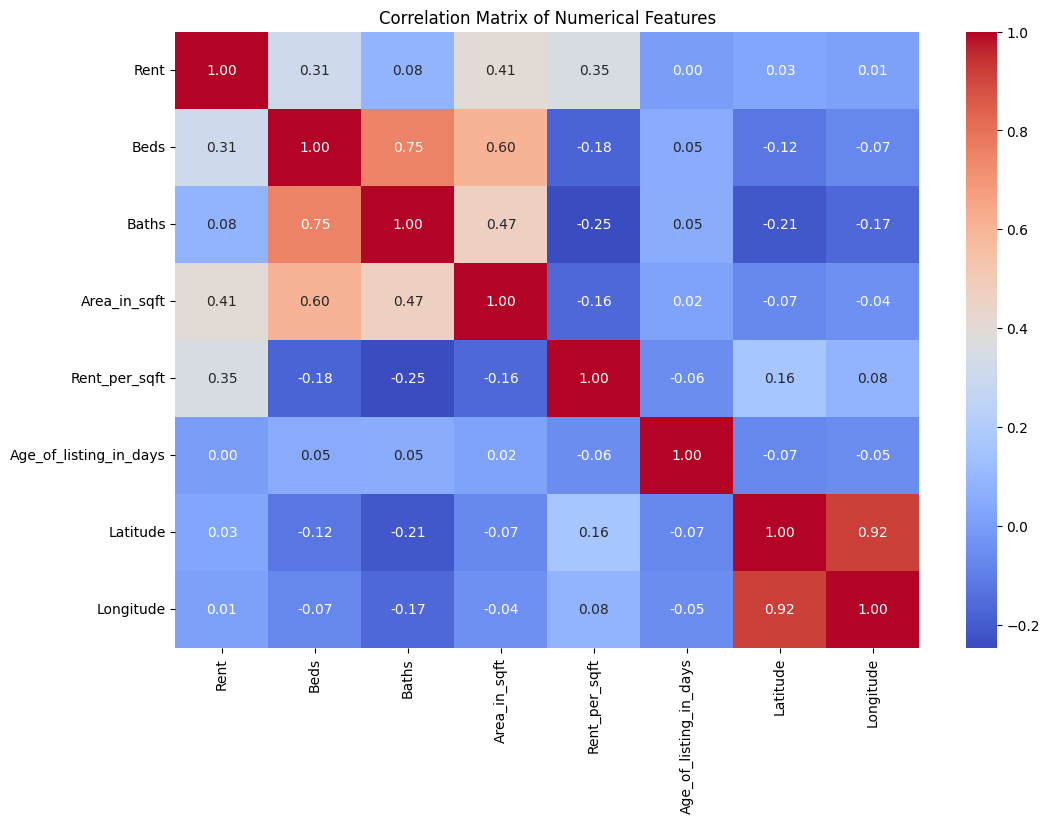

In [21]:
# Analyzing the correlation between numerical features and rent prices
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# processing data

#### delete null values

In [8]:
df.dropna(inplace=True)
print(df.isna().sum())

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64


#### Encoding

In [9]:
obj_columns = df.select_dtypes(include=["object"]).columns
for col in obj_columns:
    uniques = df[col].unique()
    print(col, uniques)

Address ['The Gate Tower 2, The Gate Tower, Shams Gate District, Shams Abu Dhabi, Al Reem Island, Abu Dhabi'
 "Water's Edge, Yas Island, Abu Dhabi"
 'Al Raha Lofts, Al Raha Beach, Abu Dhabi' ...
 'Umm Al Quwain Marina, Umm Al Quwain'
 'Al Humrah B, Al Humrah, Umm Al Quwain'
 'Al Huboob 1, Al Salamah, Umm Al Quwain']
Type ['Apartment' 'Penthouse' 'Villa' 'Townhouse' 'Villa Compound'
 'Residential Building' 'Residential Floor' 'Hotel Apartment'
 'Residential Plot']
Rent_category ['Medium' 'High' 'Low']
Frequency ['Yearly']
Furnishing ['Unfurnished' 'Furnished']
Purpose ['For Rent']
Posted_date ['2024-03-07' '2024-03-08' '2024-03-21' '2024-02-24' '2024-02-16'
 '2023-12-12' '2024-03-11' '2024-02-22' '2024-04-05' '2023-01-29'
 '2024-03-25' '2024-03-22' '2024-04-02' '2024-03-18' '2024-03-14'
 '2023-12-01' '2024-02-27' '2024-03-29' '2024-02-28' '2024-03-30'
 '2024-02-15' '2024-02-13' '2024-04-06' '2024-01-15' '2024-02-06'
 '2023-12-18' '2024-02-04' '2023-12-05' '2023-11-23' '2024-01-11'
 '202

In [10]:
columns_to_label_encoding = ["Rent_category", "Frequency", "Furnishing", "Purpose"]



columns_to_categorical_encoding = ["Address", "Type", "Location", "City"]

In [11]:
label_encoder = LabelEncoder()
for col in columns_to_label_encoding:
    df[col] = label_encoder.fit_transform(df[col])

In [12]:
for col in columns_to_label_encoding:
    print(col, df[col].unique())

Rent_category [2 0 1]
Frequency [0]
Furnishing [1 0]
Purpose [0]


In [13]:
df["Posted_date"] = pd.to_datetime(
    df["Posted_date"], format="%Y-%m-%d", errors="coerce"
).dt.day_of_year

In [14]:
df["Posted_date"]

0         67
1         68
2         81
3         55
4         47
        ... 
73729    343
73734    335
73735     86
73737    348
73738    348
Name: Posted_date, Length: 73023, dtype: int64

***Categorical Ecoding*** *(Target encoder)*

In [15]:
encoder = ce.TargetEncoder(cols=columns_to_categorical_encoding)
df_encoded = encoder.fit_transform(
    df[columns_to_categorical_encoding], df["Rent_category"]
)

df = pd.concat(
    [df.drop(columns=columns_to_categorical_encoding), df_encoded], axis=1
)

In [16]:
df[columns_to_categorical_encoding]

,Address,Type,Location,City
0,1.657879,1.124855,1.542257,1.129055
1,1.492669,1.124855,0.676570,1.129055
2,1.579157,1.124855,1.183628,1.129055
3,1.233044,0.345865,1.542257,1.129055
4,0.026813,0.664384,0.676570,1.129055
...,...,...,...,...
73729,1.064120,1.124855,1.061601,1.026556
73734,1.058366,0.664384,1.036987,1.026556
73735,1.006878,1.124855,1.048763,1.026556
73737,1.007076,1.124855,1.061601,1.026556


## Handling Outilers

#### Handling outliers in 1st column

In [17]:
print(df.columns[0])

Rent


<Axes: >

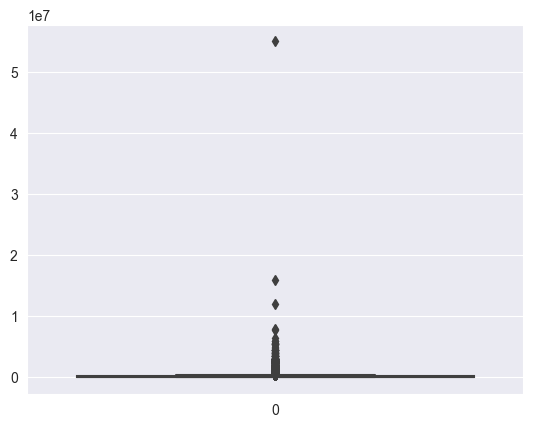

In [18]:
sns.set_style("darkgrid")
sns.boxplot(data=df["Rent"])

In [19]:
num_rent_outiers = (df["Rent"] > 1e7).sum()
print(num_rent_outiers)

3


In [20]:
rent_mean = df["Rent"].mean()
print(rent_mean)
print(df["Rent"].min(), df["Rent"].max())

148372.3144625666
0 55000000


In [21]:
df["Rent"].loc[df["Rent"] > 1e7] = 1e7

C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_18972\3318389314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rent"].loc[df["Rent"] > 1e7] = 1e7


In [22]:
# check outliers again
num_rent_outiers = (df["Rent"] > 1e7).sum()
print(num_rent_outiers)

0


***Handling outliers in 2nd column***

In [23]:
print(df.columns[1])

Beds


<Axes: >

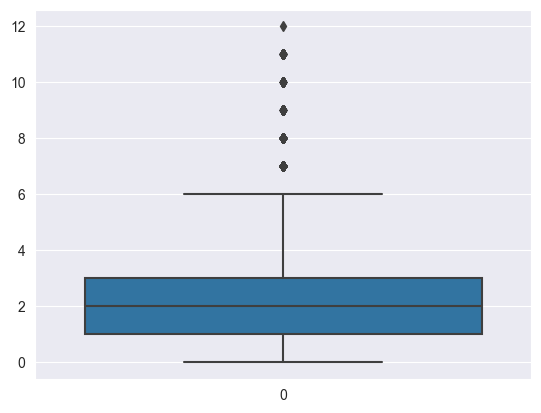

In [24]:
sns.boxplot(data=df["Beds"])

In [25]:
print(df["Beds"].min(), df["Beds"].max())

0 12


***Handling outliers in 3rd column***

In [26]:
print(df.columns[2])

Baths


<Axes: >

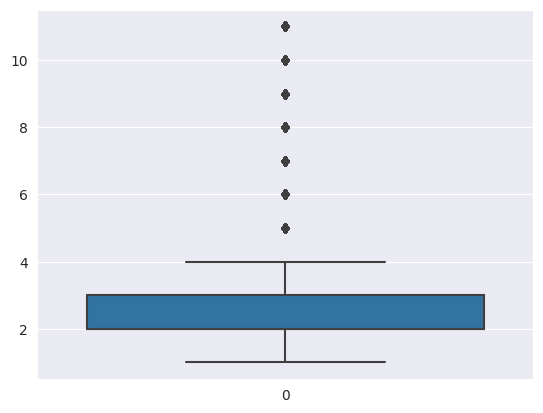

In [41]:
sns.boxplot(data=df["Baths"])

In [27]:
num_baths_outiers = (df["Baths"] > 10).sum()
print(num_baths_outiers)

201


In [28]:
print((df["Baths"]).max())

11


***Handling outliers in 4th column***

In [29]:
print(df.columns[3])

Area_in_sqft


<Axes: >

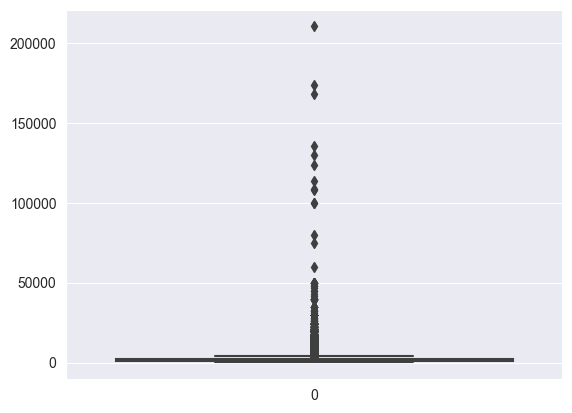

In [30]:
sns.boxplot(data=df["Area_in_sqft"])

In [31]:
area_mean = (df["Area_in_sqft"]).mean()
print(area_mean)

2035.6344713309504


In [32]:
num_area_outiers = (df["Area_in_sqft"] > 10000).sum()
print(num_area_outiers)

1171


In [33]:
(df["Area_in_sqft"]).max()

210254

In [34]:
df["Area_in_sqft"].loc[df["Area_in_sqft"] > 10000] = 10000

C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_18972\647713150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Area_in_sqft"].loc[df["Area_in_sqft"] > 10000] = 10000


In [35]:
# check outliers again
num_outiers = (df["Area_in_sqft"] > 10000).sum()
print(num_outiers)

0


***Handling outliers in 5th column***

Rent_per_sqft
1154
0


C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_18972\2318719160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rent_per_sqft"].loc[df["Rent_per_sqft"] > 280] = 280


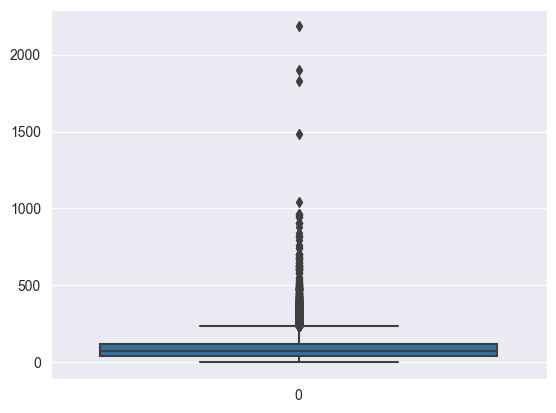

In [36]:
print(df.columns[4])

sns.boxplot(data=df["Rent_per_sqft"])

num_rent_sqft_outliears = (df["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

df["Rent_per_sqft"].loc[df["Rent_per_sqft"] > 280] = 280

# check num outliers again
num_rent_sqft_outliears = (df["Rent_per_sqft"] > 280).sum()
print(num_rent_sqft_outliears)

***Handling outliers in 6th column***

Rent_category


<Axes: >

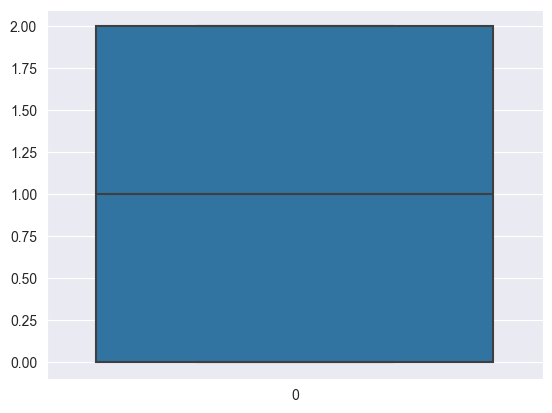

In [37]:
print(df.columns[5])

sns.boxplot(data=df["Rent_category"])

***Handling outliers in 7th column***

Frequency
0 0


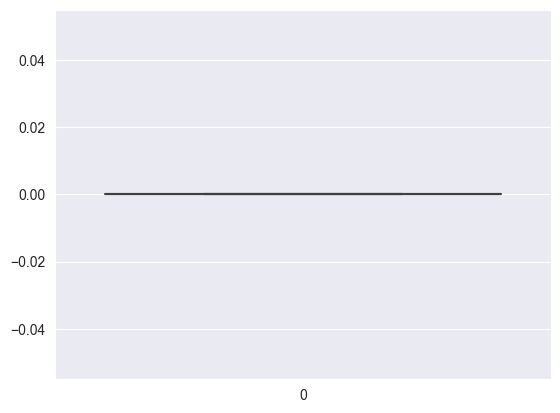

In [38]:
print(df.columns[6])

sns.boxplot(data=df["Frequency"])

print(
    df["Frequency"].max(),
    df["Frequency"].min(),
)

***Handling outliers in 8th column***

Furnishing


<Axes: >

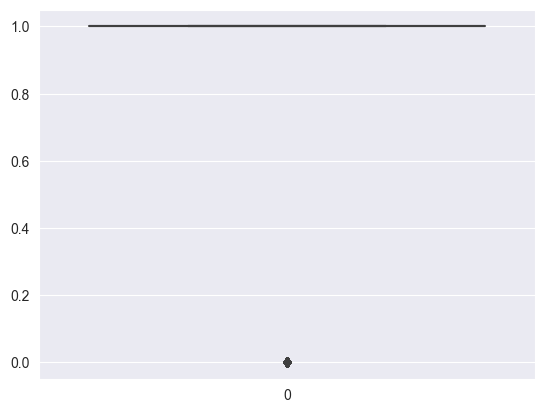

In [39]:
print(df.columns[7])

sns.boxplot(data=df["Furnishing"])

***Handling outliers in 9th column***

Purpose


<Axes: >

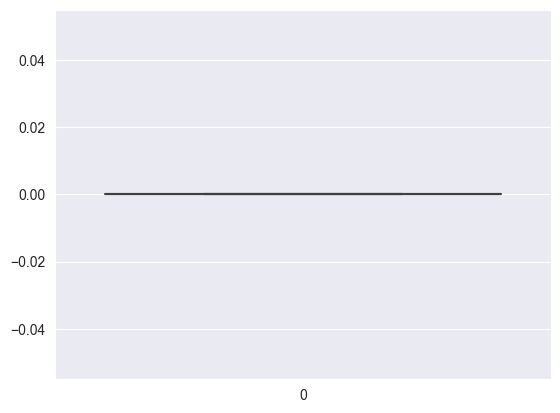

In [40]:
print(df.columns[8])

sns.boxplot(data=df["Purpose"])

***Handling outliers in 10th column***

Posted_date
1 365
8689
110.61766840584474
0


C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_18972\3859899349.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Posted_date"].loc[df["Posted_date"] > 300] = date_mean


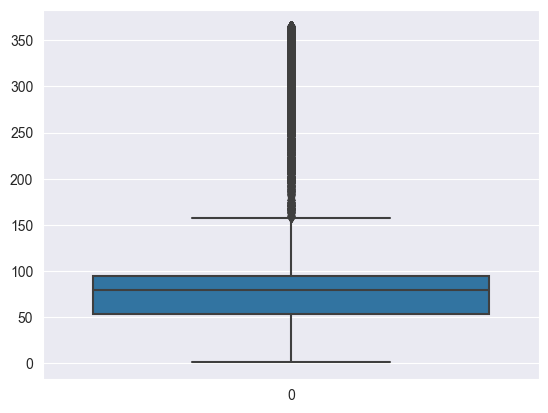

In [41]:
print(df.columns[9])

sns.boxplot(data=df["Posted_date"])

print(df["Posted_date"].min(), df["Posted_date"].max())
num_date_outlin = (df["Posted_date"] > 300).sum()
print(num_date_outlin)

date_mean = df["Posted_date"].mean()
print(date_mean)

df["Posted_date"].loc[df["Posted_date"] > 300] = date_mean

print((df["Posted_date"] > 300).sum())

***Handling outliers in 11th column***

Age_of_listing_in_days
11 2276
3314
73.8847349465237
0


C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_18972\228952655.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_of_listing_in_days"].loc[df["Age_of_listing_in_days"] > 200] = 200


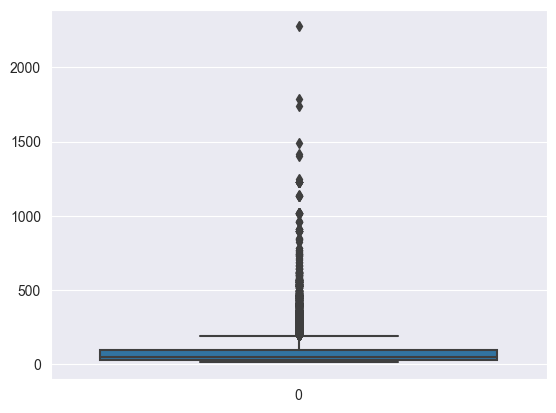

In [42]:
print(df.columns[10])

sns.boxplot(data=df["Age_of_listing_in_days"])

print(df["Age_of_listing_in_days"].min(), df["Age_of_listing_in_days"].max())
num_age_outlier = (df["Age_of_listing_in_days"] > 200).sum()
print(num_age_outlier)

age_mean = df["Age_of_listing_in_days"].mean()
print(age_mean)

df["Age_of_listing_in_days"].loc[df["Age_of_listing_in_days"] > 200] = 200

print((df["Age_of_listing_in_days"] > 200).sum())

***Handling outliers in 12th column***

Latitude
15.175847 25.9203098


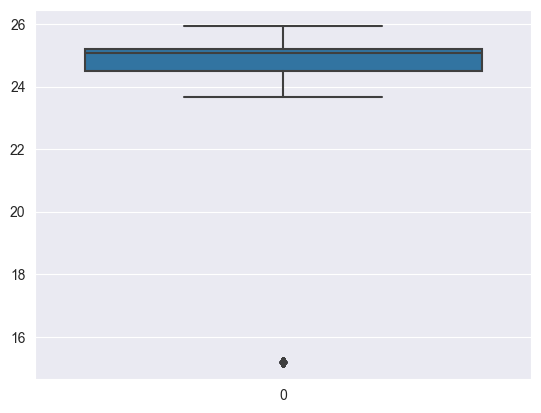

In [43]:
print(df.columns[11])

sns.boxplot(data=df["Latitude"])

print(df["Latitude"].min(), df["Latitude"].max())

***Handling outliers in 13th column***

Longitude
43.351928 56.36129352186721


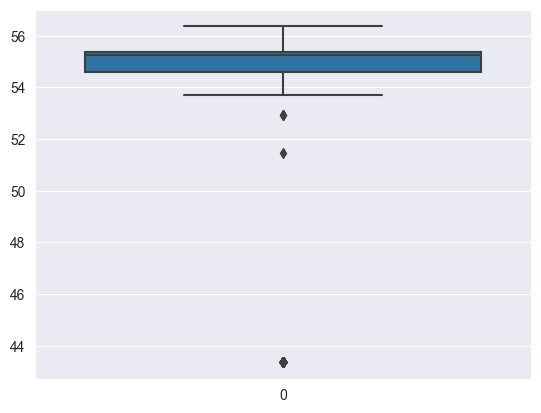

In [44]:
print(df.columns[12])

sns.boxplot(data=df["Longitude"])

print(df["Longitude"].min(), df["Longitude"].max())

***Handling outliers in 14th column***

Address
1.0065925402621323
68787
68787


C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_18972\1946838443.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Address"].loc[df["Address"] > 2.5] = address_mean
C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_18972\1946838443.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Address"].loc[df["Address"] < 1.7] = address_mean


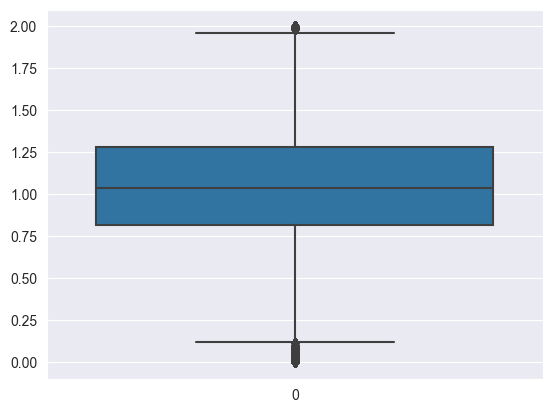

In [45]:
print(df.columns[13])

sns.boxplot(data=df["Address"])

address_mean = df["Address"].mean()
print(address_mean)

num_outiers = (df["Address"] > 2.5).sum() + (df["Address"] < 1.7).sum()
print(num_outiers)

df["Address"].loc[df["Address"] > 2.5] = address_mean
df["Address"].loc[df["Address"] < 1.7] = address_mean

# check outliers again
num_outiers = (df["Address"] > 2.5).sum() + (df["Address"] < 1.7).sum()
print(num_outiers)

***Handling outliers in 15th column***

Type
0.12552322676377933 1.1248553060388582


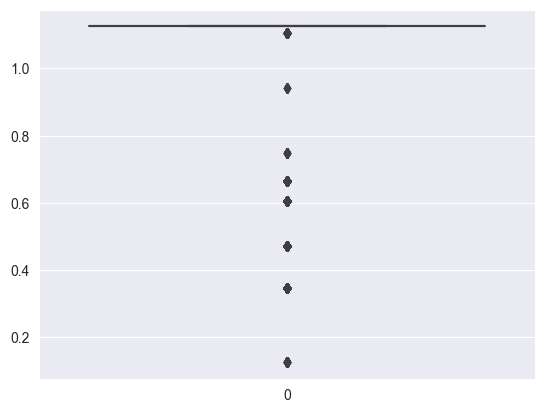

In [46]:
print(df.columns[14])

sns.boxplot(data=df["Type"])

print(df["Type"].min(), df["Type"].max())

***Handling outliers in 16th column***

Location
5.137353698804655e-11 1.9594095940839868


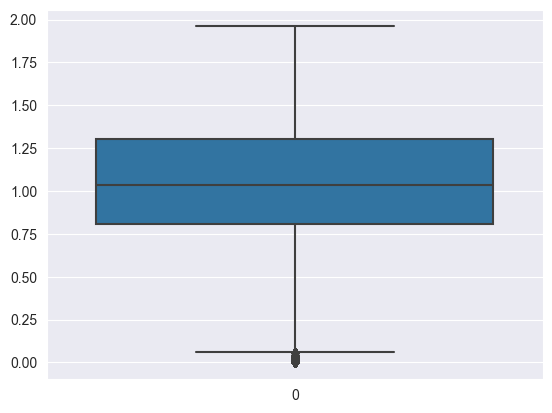

In [47]:
print(df.columns[15])

sns.boxplot(data=df["Location"])

print(df["Location"].min(), df["Location"].max())

***Handling outliers in 17th column***

City
0.8481253105000146 1.315038893690579


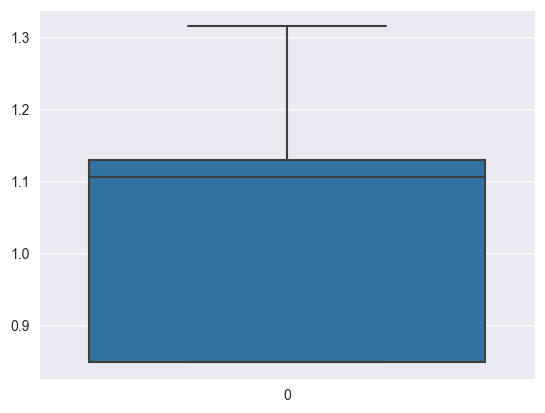

In [48]:
print(df.columns[16])

sns.boxplot(data=df["City"])

print(df["City"].min(), df["City"].max())

### ***Scaling***

In [49]:
print(df.columns)

Index(['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft',
       'Rent_category', 'Frequency', 'Furnishing', 'Purpose', 'Posted_date',
       'Age_of_listing_in_days', 'Latitude', 'Longitude', 'Address', 'Type',
       'Location', 'City'],
      dtype='object')


In [50]:
colums_to_scaling = [
    "Beds",
    "Baths",
    "Area_in_sqft",
    "Rent_per_sqft",
    "Furnishing",
    "Posted_date",
    "Age_of_listing_in_days",
    "Latitude",
    "Longitude",
    "Address",
]

In [51]:
scaler = MinMaxScaler(feature_range=(1, 2))
scaler.fit(df[colums_to_scaling])

MinMaxScaler(feature_range=(1, 2))

In [52]:
scaler.fit_transform(df[colums_to_scaling])

array([[1.25      , 1.3       , 1.17237558, ..., 1.86721426, 1.84984256,
        1.        ],
       [1.25      , 1.3       , 1.13580496, ..., 1.86725372, 1.8651801 ,
        1.        ],
       [1.16666667, 1.2       , 1.12492444, ..., 1.86650065, 1.86468562,
        1.        ],
       ...,
       [1.16666667, 1.1       , 1.09329035, ..., 1.96348344, 1.94198285,
        1.        ],
       [1.        , 1.        , 1.0347572 , ..., 1.96026806, 1.93963585,
        1.        ],
       [1.        , 1.        , 1.04291759, ..., 1.96348344, 1.94198285,
        1.        ]])

In [53]:
df[colums_to_scaling] = scaler.transform(df[colums_to_scaling])

In [54]:
df[colums_to_scaling]

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Furnishing,Posted_date,Age_of_listing_in_days,Latitude,Longitude,Address
0,1.250000,1.3,1.172376,1.248099,2.0,1.220736,1.179894,1.867214,1.849843,1.0
1,1.250000,1.3,1.135805,1.351617,2.0,1.224080,1.174603,1.867254,1.865180,1.0
2,1.166667,1.2,1.124924,1.269080,1.0,1.267559,1.105820,1.866501,1.864686,1.0
3,1.250000,1.3,1.379710,1.204453,2.0,1.180602,1.243386,1.867214,1.849843,1.0
4,1.416667,1.6,1.683659,1.182216,2.0,1.153846,1.285714,1.867254,1.865180,1.0
...,...,...,...,...,...,...,...,...,...,...
73729,1.000000,1.0,1.017630,1.143431,2.0,1.366614,1.650794,1.960268,1.939636,1.0
73734,1.083333,1.0,1.042918,1.178571,2.0,1.366614,1.693122,1.961948,1.939852,1.0
73735,1.166667,1.1,1.093290,1.078571,2.0,1.284281,1.079365,1.963483,1.941983,1.0
73737,1.000000,1.0,1.034757,1.119332,2.0,1.366614,1.624339,1.960268,1.939636,1.0


In [55]:
df.dropna(inplace=True)
print(df.isna().sum())

Rent                      0
Beds                      0
Baths                     0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Latitude                  0
Longitude                 0
Address                   0
Type                      0
Location                  0
City                      0
dtype: int64


## Features selections

##### seperate features from targets

In [56]:
features = df.drop(['Rent_category','Rent'],axis=1)
features

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Latitude,Longitude,Address,Type,Location,City
0,1.250000,1.3,1.172376,1.248099,0,2.0,0,1.220736,1.179894,1.867214,1.849843,1.0,1.124855,1.542257,1.129055
1,1.250000,1.3,1.135805,1.351617,0,2.0,0,1.224080,1.174603,1.867254,1.865180,1.0,1.124855,0.676570,1.129055
2,1.166667,1.2,1.124924,1.269080,0,1.0,0,1.267559,1.105820,1.866501,1.864686,1.0,1.124855,1.183628,1.129055
3,1.250000,1.3,1.379710,1.204453,0,2.0,0,1.180602,1.243386,1.867214,1.849843,1.0,0.345865,1.542257,1.129055
4,1.416667,1.6,1.683659,1.182216,0,2.0,0,1.153846,1.285714,1.867254,1.865180,1.0,0.664384,0.676570,1.129055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73729,1.000000,1.0,1.017630,1.143431,0,2.0,0,1.366614,1.650794,1.960268,1.939636,1.0,1.124855,1.061601,1.026556
73734,1.083333,1.0,1.042918,1.178571,0,2.0,0,1.366614,1.693122,1.961948,1.939852,1.0,0.664384,1.036987,1.026556
73735,1.166667,1.1,1.093290,1.078571,0,2.0,0,1.284281,1.079365,1.963483,1.941983,1.0,1.124855,1.048763,1.026556
73737,1.000000,1.0,1.034757,1.119332,0,2.0,0,1.366614,1.624339,1.960268,1.939636,1.0,1.124855,1.061601,1.026556


#### features from classification the rent_category

In [57]:
#feature selection for Rent_category 
selector = SelectKBest(f_classif, k=5)  # select top 5 features
selected_features_classification = selector.fit_transform(features , df['Rent_category'])

# get the mask of selected features
mask = selector.get_support()

#features classificaion labels
features_classification_labels =features.columns.tolist()

# assume feature_labels is a list of feature labels
selected_feature_classification_labels = [features_classification_labels[i] for i in range(len(mask)) if mask[i]]

print(selected_feature_classification_labels)  # print the labels of the selected features

['Beds', 'Area_in_sqft', 'Rent_per_sqft', 'Type', 'Location']


c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [4 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#### features for clustring rent

In [58]:
#feature selection for Rent_category 
selector = SelectKBest(f_classif, k=5)  # select top 5 features
selected_features_clastaring = selector.fit_transform(features , df['Rent'])

# get the mask of selected features
mask = selector.get_support()

#features classificaion labels
features_clastaring_labels =features.columns.tolist()

# assume feature_labels is a list of feature labels
selected_feature_clastaring_labels = [features_clastaring_labels[i] for i in range(len(mask)) if mask[i]]

print(selected_feature_clastaring_labels)  # print the labels of the selected features

['Beds', 'Area_in_sqft', 'Rent_per_sqft', 'Location', 'City']


c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [4 6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#### dimentionality reduction 

In [59]:
pca = PCA(n_components=0.95)  # retain 95% of the variance
pca_features = pca.fit_transform(features)

# get the loadings (weights) of each feature in the principal components
loadings = pca.components_

# get the feature names
feature_names = features.columns

# sort the features by their loadings (absolute values)
sorted_features = sorted(zip(feature_names, loadings), key=lambda x: abs(x[1]).max(), reverse=True)

# select the top k features
k = 5
important_features_PCA = [feature[0] for feature in sorted_features[:k]]

print(important_features_PCA)  # print the top k important features

['Area_in_sqft', 'Purpose', 'Frequency', 'Beds', 'Baths']


# Regression Model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [98]:
selected_features = [feature for feature in selected_feature_classification_labels if feature != 'Rent']
X = df[selected_features]  # Features
y = df['Rent']  

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)


LinearRegression()

In [100]:
# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model (for regression, you might use Mean Squared Error or other regression metrics)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 37435096764.14082


In [101]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 37435096764.14082
Mean Absolute Error (MAE): 64774.46501559018
R-squared (R2) Score: 0.4450860834059548


In [102]:
# Initialize the Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

In [103]:
# Evaluate the model using multiple metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 6232130933.451142
Mean Absolute Error (MAE): 5600.54514269082
R-squared (R2) Score: 0.9076188795023769


In [74]:
df.columns

Index(['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft',
       'Rent_category', 'Frequency', 'Furnishing', 'Purpose', 'Posted_date',
       'Age_of_listing_in_days', 'Latitude', 'Longitude', 'Address', 'Type',
       'Location', 'City'],
      dtype='object')

In [75]:
important_features_PCA

['Area_in_sqft', 'Purpose', 'Frequency', 'Beds', 'Baths']

In [91]:
df['Rent_category'].values

array([2, 2, 2, ..., 1, 1, 1])

# classification

In [109]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score


In [105]:
# Select features and target
features = ['Area_in_sqft', 'Purpose', 'Frequency', 'Beds', 'Baths']
X = df[features]
y = df['Rent_category'] 

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train multiple classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

In [112]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    
    # Print classification report
    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred))
    print('-' * 50)

Random Forest Accuracy: 0.7329
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      4839
           1       0.77      0.79      0.78      4770
           2       0.64      0.65      0.65      4996

    accuracy                           0.73     14605
   macro avg       0.73      0.73      0.73     14605
weighted avg       0.73      0.73      0.73     14605

--------------------------------------------------
Gradient Boosting Accuracy: 0.7009
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      4839
           1       0.83      0.65      0.73      4770
           2       0.60      0.69      0.64      4996

    accuracy                           0.70     14605
   macro avg       0.72      0.70      0.70     14605
weighted avg       0.72      0.70      0.70     14605

-----------------------------------

# clustring

In [113]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [114]:
# Select clustering features
selected_features = ['Beds', 'Area_in_sqft', 'Rent_per_sqft', 'Location', 'City']
X = df[selected_features]

c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Mohamed El

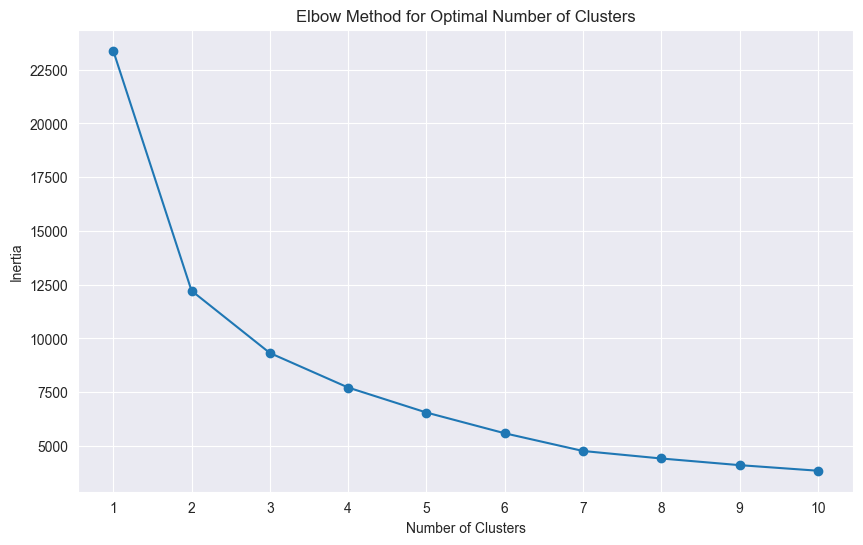

In [115]:
# Initialize empty list to store inertia values
inertia_values = []

# Test different numbers of clusters
for k in range(1, 11):  # Try cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

c:\Users\Mohamed Elzoka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


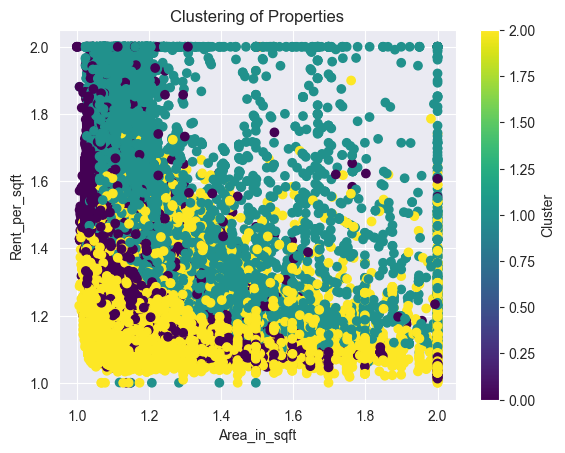

In [117]:
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans model to the scaled data
kmeans.fit(X)

# Get cluster labels and add them to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualize clusters (example for 2D visualization)
plt.scatter(X['Area_in_sqft'], X['Rent_per_sqft'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Area_in_sqft')
plt.ylabel('Rent_per_sqft')
plt.title('Clustering of Properties')
plt.colorbar(label='Cluster')
plt.show()